***Context***: The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. It is difficult to understand the original dataset due to its complicated system of categories and symbols. Thus, several columns are simply ignored, because they are not important, or their descriptions are obscure. The selected attributes are:
- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text - little, moderate, quite rich, rich)
- Checking account (numeric, in DM - Deutsch Mark)
- Credit amount (numeric, in DM)
- Duration (numeric, in month)
- Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
- Risk (Target value - Good or Bad Risk

***Task***: Goal of this project is to cluster the customers and classify whether an applicant is considered a Good or a Bad credit risk for 1000 loan applicants

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

import warnings
warnings.simplefilter("ignore")

In [14]:
df = pd.read_excel("german_credit_data.xlsx")
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [16]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [17]:
df.describe(include=['object'])

,Sex,Housing,Saving accounts,Checking account,Purpose,Risk
count,1000,1000,817,606,1000,1000
unique,2,3,4,3,8,2
top,male,own,little,little,car,good
freq,690,713,603,274,337,700


In [18]:
#checking missing data
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

We notice some missing values in the Saving accounts and Checking Account columns

count        817
unique         4
top       little
freq         603
Name: Saving accounts, dtype: object


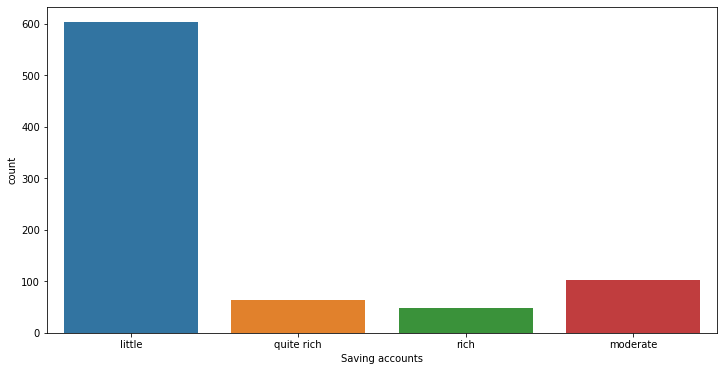

In [19]:
# check Saving accounts distribution
print(df['Saving accounts'].describe())

plt.figure(figsize=(12,6))
sns.countplot(x='Saving accounts',data = df)

plt.show()

From the above plot, we can see that the value of the saving account distribution. The most common value "little", (603/817), I decided to  assign all the missing value as "little"

In [20]:
# Assign missing vlaue with little

df['Saving accounts'].fillna('little', inplace = True)
df['Saving accounts'].describe()

count       1000
unique         4
top       little
freq         786
Name: Saving accounts, dtype: object

Now we have no missing values in the Saving accounts column. Next we fill the checking account column.

count        606
unique         3
top       little
freq         274
Name: Checking account, dtype: object


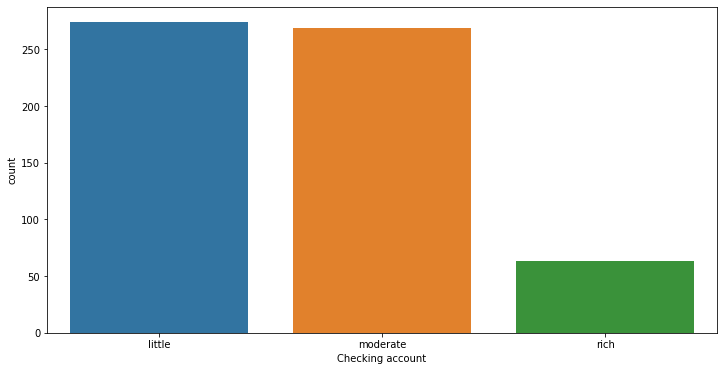

In [21]:
# check Checking accounts distribution
print(df['Checking account'].describe())

plt.figure(figsize=(12,6))
sns.countplot(x='Checking account',data=df)

plt.show()

We can see that the current distribution is pretty even between Little and Moderate; and only small amount has value of rich. For this I can't seem to decide which variable to fill the missing values with, so I decided to fill them with "unknown". 

In [22]:
# fill the missing value with a category called "unknown"
df['Checking account'].fillna('unknown', inplace=True)
df['Checking account'].head()
df['Checking account'].describe()

count        1000
unique          4
top       unknown
freq          394
Name: Checking account, dtype: object

Wow we've filled our missing data, next plot the histogram to check for skewed features.

### Histogram for Numerical features

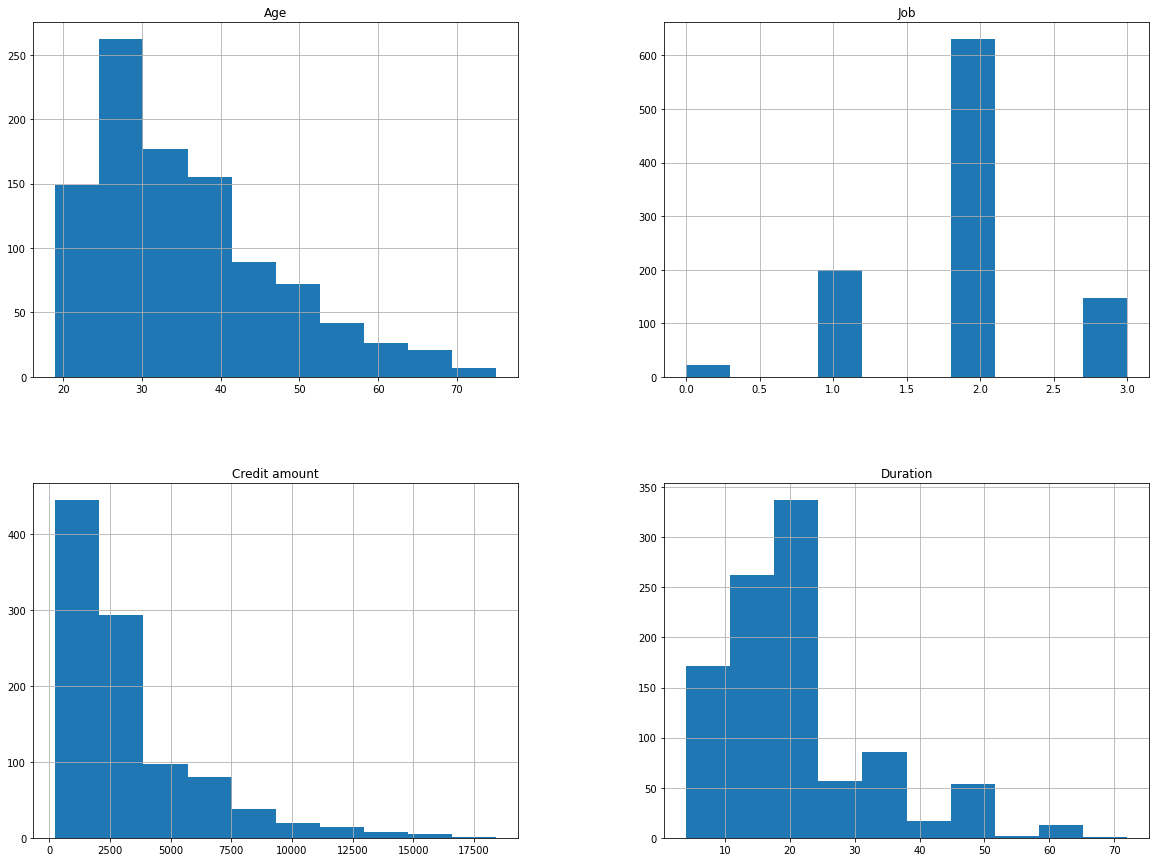

In [23]:
df.hist(figsize = (20,15));

Distribution of Age and Credit Amount are positively skewed, we will apply log-transformation for the features.

In [24]:
categorical = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

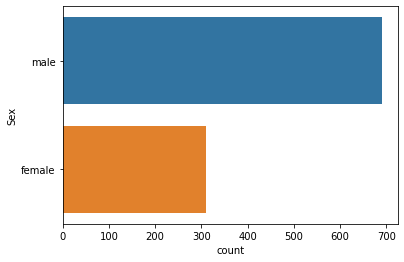

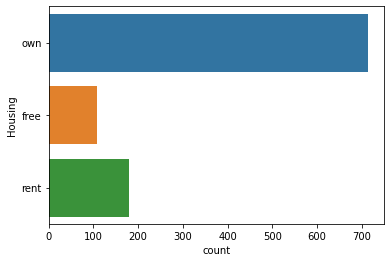

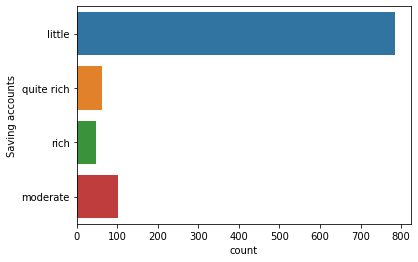

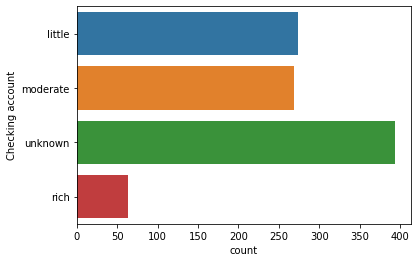

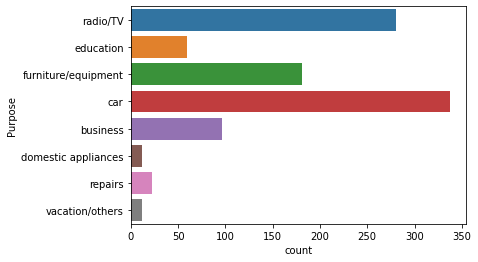

In [25]:
# Checking distribution of categorical features
for col in df[categorical].columns:
    sns.countplot(y =col, data = df)
    plt.show()

I decided to perform extra EDA on the categorical columns, I noticed the following:
1. There are twice as many male customers as female.
2. Most of customers are skilled.
3. Most of customers have their own house.
4. Most of customers have little saving accounts.
5. The most popular purpose is "Car".

#### Next I'll perform log trasformation on the skewed features


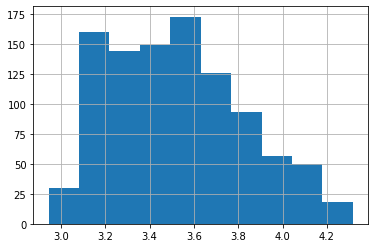

In [26]:
np.log(df['Age']).hist()

In [27]:
df['Age'] = np.log(df['Age'])

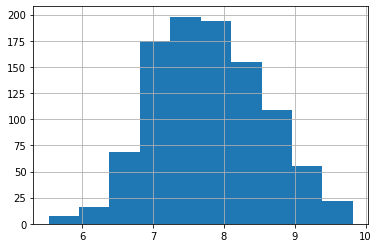

In [28]:
np.log(df['Credit amount']).hist()

In [29]:
df['Credit amount'] = np.log(df['Credit amount'])

Now I've performed log_transformation on the skewed features, as we can see from the plots above. They are now normally distributed.


#### Next I'll perform One Hot Encoding on the Categorical features

In [30]:
#separating features and target column
data = df.drop('Risk', axis=1)
target = df['Risk']

In [31]:
#encoding categorical features
data = pd.get_dummies(data)
data.head()

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Checking account_rich,Checking account_unknown,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,4.204693,2,7.063904,6,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,3.091042,2,8.691315,48,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3.891820,1,7.647786,12,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
3,3.806662,2,8.972337,42,0,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,3.970292,2,8.490849,24,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [32]:
#encoding target feature
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#invoking fit_transform method on object
target=le.fit_transform(target)

target[0:10]


array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0])

Now I've concluded cleaning the dataset, next I'll perform feature scaling on the dataset. 


### Scaling the Dataset

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(X_scaled, columns=data.columns)
data_scaled.head()

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Checking account_rich,Checking account_unknown,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,2.271006,0.146949,-0.933901,-1.236478,-0.670280,0.670280,-0.347960,0.634448,-0.466933,0.52179,...,-0.259299,-0.806328,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
1,-1.446152,0.146949,1.163046,2.248194,1.491914,-1.491914,-0.347960,0.634448,-0.466933,0.52179,...,-0.259299,-0.806328,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
2,1.226696,-1.383771,-0.181559,-0.738668,-0.670280,0.670280,-0.347960,0.634448,-0.466933,0.52179,...,-0.259299,1.240190,-0.327749,-0.712949,-0.110208,3.993639,-0.470108,-0.623610,-0.149983,-0.110208
3,0.942455,0.146949,1.525148,1.750384,-0.670280,0.670280,2.873893,-1.576173,-0.466933,0.52179,...,-0.259299,-0.806328,-0.327749,-0.712949,-0.110208,-0.250398,2.127172,-0.623610,-0.149983,-0.110208
4,1.488620,0.146949,0.904743,0.256953,-0.670280,0.670280,2.873893,-1.576173,-0.466933,0.52179,...,-0.259299,-0.806328,-0.327749,1.402626,-0.110208,-0.250398,-0.470108,-0.623610,-0.149983,-0.110208


I've scaled the dataset, now its time to perform clustering and PCA on the numerical features as instructed.


### Performing KMeans Clustering and PCA


In [34]:
data.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Sex_female', 'Sex_male',
       'Housing_free', 'Housing_own', 'Housing_rent', 'Saving accounts_little',
       'Saving accounts_moderate', 'Saving accounts_quite rich',
       'Saving accounts_rich', 'Checking account_little',
       'Checking account_moderate', 'Checking account_rich',
       'Checking account_unknown', 'Purpose_business', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others'],
      dtype='object')

In [48]:
numeric = ['Age', 'Job', 'Credit amount', 'Duration']
categorical = ['Sex_female', 'Sex_male',
       'Housing_free', 'Housing_own', 'Housing_rent', 'Saving accounts_little',
       'Saving accounts_moderate', 'Saving accounts_quite rich',
       'Saving accounts_rich', 'Checking account_little', 'Checking account_moderate',
       'Checking account_rich', 'Checking account_unknown', 'Purpose_business',
       'Purpose_car', 'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others']

In [36]:
#preparing numerical features for clustering
d_clust = data_scaled[numeric].values
d_clust[0:5]

array([[ 2.27100592,  0.14694918, -0.933901  , -1.23647786],
       [-1.44615223,  0.14694918,  1.16304581,  2.24819436],
       [ 1.22669602, -1.38377145, -0.1815588 , -0.73866754],
       [ 0.94245501,  0.14694918,  1.52514806,  1.75038404],
       [ 1.48861975,  0.14694918,  0.90474274,  0.25695309]])

In [37]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer # cluster visualizer

In [38]:
# Loop through clusters and fit the model to the train set
clusters=range(1,11)
meandist=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(d_clust)
    clusassign=model.predict(d_clust)
    meandist.append(sum(np.min(cdist(d_clust, model.cluster_centers_, 'euclidean'), axis=1),d_clust.shape[0]))

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

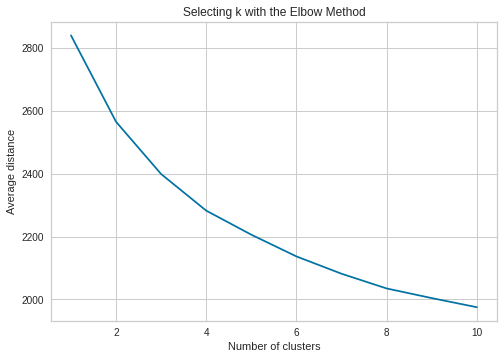

In [39]:
# display the data
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')

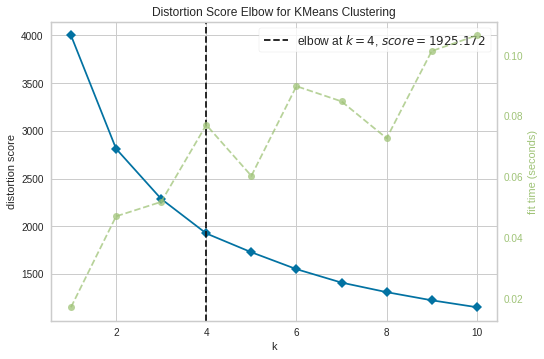

In [40]:
#using Elbow Method to check for best value of k
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(d_clust) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure
plt.show()

The elbow wasn't clear in the first plot, so I used another library that automatically shows where the elbow value is located. According to elbow plot above, we noticed that our best k value is 4.

So we'll implement that in our KMeans.

In [41]:
kmeans = KMeans(n_clusters=4, random_state=10)
kmeans.fit(d_clust)
k_pred = kmeans.predict(d_clust)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Text(0.5, 1.0, 'Plot of Clusters')

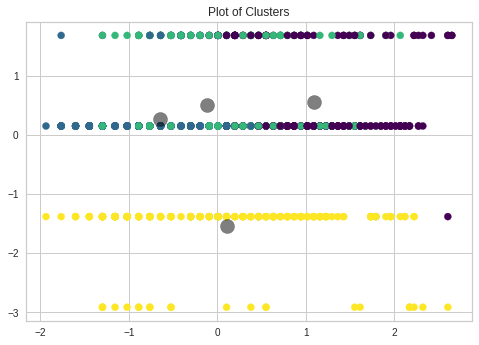

In [42]:
plt.scatter(d_clust[:, 0], d_clust[:, 1], c=k_pred, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5);
plt.title('Plot of Clusters')

From the above plot of our clusters, we can see that its not really doing a good job in clustering the dataset.

Next we perform PCA on the numerical data so we can visualize our clusters with PCA.

In [55]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(d_clust)

In [56]:
principalDf = pd.DataFrame(data = X_pca, columns = ['pc1', 'pc2', 'pc3', 'pc4'])
principalDf.head()

,pc1,pc2,pc3,pc4
0,-1.300521,2.401550,-0.346927,0.030911
1,2.221414,-1.662738,0.654723,-0.626069
2,-1.139916,1.069725,1.154766,0.470102
3,2.178853,0.731846,0.997767,-0.145597
4,0.837862,1.443393,0.429970,0.389740


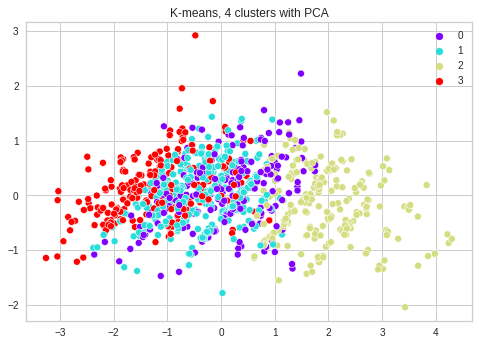

In [63]:
plt.title('K-means, 4 clusters with PCA')
sns.scatterplot(x = X_pca[:,0], y = X_pca[:,3], hue=labels, palette='rainbow');

After applying PCA, the clusters are beginning to make more sense compared to the dataset without the PCA

### Implementing KFOLD CV and using a Classifier Model on both PCA feature and Categorical Features

In [64]:
#merging the PCA features and categorical features for training our model
merged_data = data[categorical].join(principalDf)

In [65]:
#splitting out features and target variables
X = merged_data.values
y = target

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.ensemble import  RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics

scoring = ['precision_macro', 'recall_macro', 'balanced_accuracy']
cv = KFold(n_splits=5, random_state=1, shuffle=True)
#model = SVC(kernel='linear', C=1)
rf = RandomForestClassifier(n_estimators =10, random_state = 42, class_weight="balanced")
scores = cross_validate(rf, X, y, scoring=scoring, cv=cv, return_estimator=True)

scores


{'estimator': [RandomForestClassifier(class_weight='balanced', n_estimators=10,
                         random_state=42),
  RandomForestClassifier(class_weight='balanced', n_estimators=10,
                         random_state=42),
  RandomForestClassifier(class_weight='balanced', n_estimators=10,
                         random_state=42),
  RandomForestClassifier(class_weight='balanced', n_estimators=10,
                         random_state=42),
  RandomForestClassifier(class_weight='balanced', n_estimators=10,
                         random_state=42)],
 'fit_time': array([0.04994297, 0.04387021, 0.0605216 , 0.04628897, 0.05445433]),
 'score_time': array([0.00888896, 0.00853753, 0.0080955 , 0.00912929, 0.00865412]),
 'test_balanced_accuracy': array([0.64725328, 0.59871032, 0.67189566, 0.650504  , 0.64320473]),
 'test_precision_macro': array([0.66333333, 0.61790846, 0.6702381 , 0.66476408, 0.65327381]),
 'test_recall_macro': array([0.64725328, 0.59871032, 0.67189566, 0.650504  , 0.6

After implementing KFold CV for 5folds with the RandomForestClassifier Model above, we're not getting the best scores according to the accuracy, precision and recall scores above. So I decided to check the feature importance below.

In [66]:
for idx,estimator in enumerate(scores['estimator']):
    print("Features sorted by their score for estimator {}:".format(idx))
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index = merged_data.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
    print(feature_importances)

Features sorted by their score for estimator 0:
                             importance
pc4                            0.172076
pc3                            0.163398
pc1                            0.154341
pc2                            0.142835
Checking account_unknown       0.089422
Checking account_little        0.038482
Housing_own                    0.024330
Checking account_moderate      0.022182
Saving accounts_little         0.021320
Purpose_business               0.019666
Purpose_radio/TV               0.017674
Sex_male                       0.016282
Purpose_car                    0.016273
Sex_female                     0.013397
Housing_rent                   0.013286
Purpose_furniture/equipment    0.013137
Housing_free                   0.010906
Checking account_rich          0.009211
Saving accounts_rich           0.009062
Saving accounts_moderate       0.008949
Saving accounts_quite rich     0.007719
Purpose_repairs                0.006849
Purpose_education              0

After checking our most importance features in predicting from our model. We can see that our most important features are the features we performed PCA on, that is the "pc1", "pc2", "pc3", "pc4". Out of curiosity, I decided to use only the continous features with pca on the model. 


### Performing KFold CV on PCA features only

In [67]:
#splitting out features and target variables
X1 = principalDf.values
y1 = target

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.ensemble import  RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics

scoring = ['precision_macro', 'recall_macro', 'balanced_accuracy']
cv = KFold(n_splits=5, random_state=1, shuffle=True)
#model = SVC(kernel='linear', C=1)
rf = RandomForestClassifier(n_estimators =10, random_state = 42, class_weight="balanced")
scores = cross_validate(rf, X1, y1, scoring=scoring, cv=cv, return_estimator=True)

scores

{'estimator': [RandomForestClassifier(class_weight='balanced', n_estimators=10,
                         random_state=42),
  RandomForestClassifier(class_weight='balanced', n_estimators=10,
                         random_state=42),
  RandomForestClassifier(class_weight='balanced', n_estimators=10,
                         random_state=42),
  RandomForestClassifier(class_weight='balanced', n_estimators=10,
                         random_state=42),
  RandomForestClassifier(class_weight='balanced', n_estimators=10,
                         random_state=42)],
 'fit_time': array([0.03080463, 0.03265429, 0.03212929, 0.02995086, 0.03571129]),
 'score_time': array([0.00493789, 0.00470257, 0.00684762, 0.00539899, 0.00500941]),
 'test_balanced_accuracy': array([0.5942421 , 0.55357143, 0.5977882 , 0.54257908, 0.56748928]),
 'test_precision_macro': array([0.60745614, 0.55357143, 0.61312752, 0.5460815 , 0.58351254]),
 'test_recall_macro': array([0.5942421 , 0.55357143, 0.5977882 , 0.54257908, 0.5

Observation: Our perform more poorly on only the Pca features, compared to when we used both the categorical features and Pca features.